# Sentiment Analysis on Unique Textual Data using NLP

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

C:\Users\akrit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
# Download required NLTK data files 

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akrit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akrit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#Load the dataset

df = pd.read_csv("C:\\Users\\akrit\\Downloads\\unique_sentiment_reviews.csv")  
print("Sample data:")
print(df.head())

Sample data:
                                                Text Sentiment
0  Fast delivery and amazing quality, exceeded ex...  positive
1  Fast delivery and amazing quality, exceeded ex...  positive
2  Will not be coming back here again. Terrible e...  negative
3           Extremely disappointed with the service.  negative
4  Will not be coming back here again. Terrible e...  negative


In [7]:
#Exploratory Data Analysis (EDA)

print("\nSentiment distribution:")
print(df['Sentiment'].value_counts())


Sentiment distribution:
Sentiment
positive    15
negative    15
neutral     10
Name: count, dtype: int64


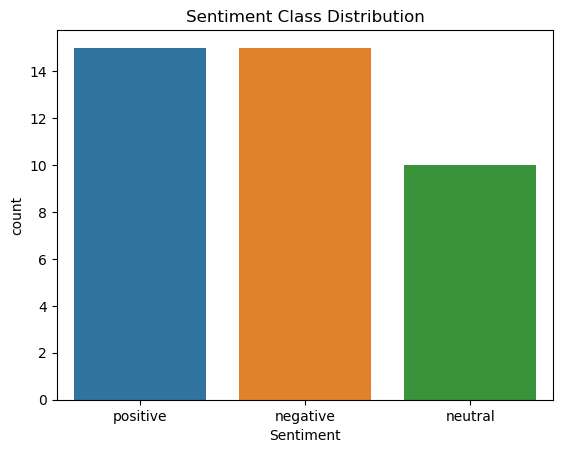

In [8]:
# Plotting sentiment distribution

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.show()

In [9]:
#Text Preprocessing Function

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['clean_text'] = df['Text'].apply(preprocess)

print("\nSample cleaned text:")
print(df[['Text', 'clean_text']].head())


Sample cleaned text:
                                                Text  \
0  Fast delivery and amazing quality, exceeded ex...   
1  Fast delivery and amazing quality, exceeded ex...   
2  Will not be coming back here again. Terrible e...   
3           Extremely disappointed with the service.   
4  Will not be coming back here again. Terrible e...   

                                          clean_text  
0  fast delivery amazing quality exceeded expecta...  
1  fast delivery amazing quality exceeded expecta...  
2                    coming back terrible experience  
3                     extremely disappointed service  
4                    coming back terrible experience  


In [13]:
# 5. Vectorization: Convert text into numerical features using TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['Sentiment']

In [14]:
# 6. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 7. Model building: Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# 8. Predictions on the test set
y_pred = model.predict(X_test)


Accuracy on test set: 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



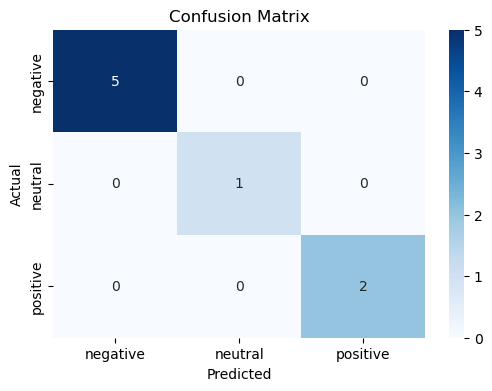

In [17]:
# 9. Model Evaluation
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()